# Comparing gradients from my code and TensorFlow for `lagaris01`

## Introduction

The purpose of this notebook is to provide a comparison between the `nnde` code and TensorFlow for the solution of the `lagaris01` ODE.

## The `lagaris01` problem

This ODE was used as the first example problem in (Lagaris et al., 1998). It has been used in several other papers in the neural network/differential equation literature. The differential equation is provided in the form (equation (27) in Lagaris (1998)):

\begin{equation}
    \frac {d\psi} {dx} + \left (x+\frac {1+3x^2} {1+x+x^3} \right ) \psi =
    x^3 + 2x + x^2 \frac {1+3x^2} {1+x+x^3}
\end{equation}

or:

\begin{equation}
    G\left(x,\psi,\frac {d\psi}{dx}\right) = \frac {d\psi} {dx} + \left (x+\frac {1+3x^2} {1+x+x^3} \right ) \psi - x^3 - 2x - x^2 \frac {1+3x^2} {1+x+x^3} = 0
\end{equation}

The initial condition is:

\begin{equation}
    \psi(0)=1
\end{equation}

The analytical solution is:

\begin{equation}
    \psi_a(x) = x^2 + \frac {e^{-x^2/2}} {1 + x +  x^3}
\end{equation}

The first derivative is:

\begin{equation}
    \frac {d\psi_a} {dx} = 2x - \frac {e^{-x^2/2} (1+x+4x^2+x^4)} {(1+x+x^3)^2}
\end{equation}

The analytical solution and derivative in the domain $[0,1]$ are plotted below.

In [1]:
# Import standard Python modules.
import datetime
from math import exp, sqrt
import matplotlib.pyplot as plt
import numpy as np

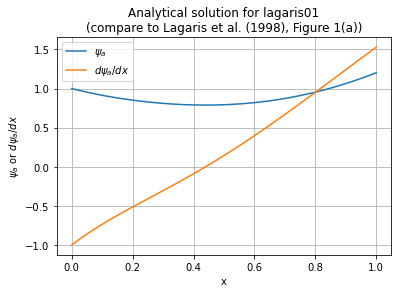

In [2]:
import nnde.differentialequation.examples.lagaris_01 as lagaris01

# Load the equation.
eq_name = "lagaris01"

# Compute the analytical solution and derivative.
na = 101
xa = np.linspace(0, 1, na)
Ya = np.zeros(na)
dYa_dx = np.zeros(na)
for i in range(na):
    Ya[i] = lagaris01.Ya(xa[i])
    dYa_dx[i] = lagaris01.dYa_dx(xa[i])

# Plot the analytical solution and derivative.
plt.plot(xa, Ya, label="$\psi_a$")
plt.plot(xa, dYa_dx, label="$d\psi_a/dx$")
plt.xlabel("x")
plt.ylabel("$\psi_a$ or $d\psi_a/dx$")
plt.grid()
plt.legend()
plt.title("Analytical solution for %s\n(compare to Lagaris et al. (1998), Figure 1(a))" %
         (eq_name));

## Solving `lagaris01` using the `nnde` package

In [3]:
# Load the nnde packages needed for this problem.
from nnde.neuralnetwork.nnode1ivp import NNODE1IVP
from nnde.differentialequation.ode.ode1ivp import ODE1IVP

# Create the training data.
xmin = 0
xmax = 1
nt = 11
xt = np.linspace(xmin, xmax, nt)

# Create the ODE object for the problem.
eq_name = 'nnde.differentialequation.examples.lagaris_01'
ode = ODE1IVP(eq_name)

# Create the network.
H = 10  # Number of hidden nodes
net1 = NNODE1IVP(ode, nhid=H)

# Specify training options.
trainalg = 'delta'
opts = {}
opts["eta"] = 0.01 # Learning rate
opts["maxepochs"] = 1000  # Number of training epochs
opts["b_min"] = -1
opts["b_max"] = 1
opts["v_min"] = -1
opts["v_max"] = 1
opts["w_min"] = -1
opts["w_max"] = 1

# Train the network.
np.random.seed(0)
print(datetime.datetime.now())
%timeit -n 1 -r 1 net1.train(xt, trainalg=trainalg, opts=opts)

2021-06-27 13:15:09.588800
The network parameters are:
w = [ 0.09762701  0.43037873  0.20552675  0.08976637 -0.1526904   0.29178823
 -0.12482558  0.783546    0.92732552 -0.23311696]
u = [ 0.58345008  0.05778984  0.13608912  0.85119328 -0.85792788 -0.8257414
 -0.95956321  0.66523969  0.5563135   0.7400243 ]
v = [ 0.95723668  0.59831713 -0.07704128  0.56105835 -0.76345115  0.27984204
 -0.71329343  0.88933783  0.04369664 -0.17067612]
E = 116.50385263464746
dE_dw = [ 29.3528164   19.39115942  -2.5711514   15.57163116 -20.54170068
   8.94326952 -18.52111747  18.96809671   0.91346324  -5.49431317]
dE_du = [ 31.36956121  20.7648199   -2.74743211  16.6475927  -21.99246481
   9.50560318 -19.82122335  20.68216892   1.00004054  -5.84570287]
dE_dv = [ 97.13471003  89.87752994  85.23293461 105.27735632  39.40398142
  53.57434883  37.26442307 117.40068375 117.92374436  91.98187667]
The network parameters are:
w = [-0.19590116  0.23646714  0.23123827 -0.06594995  0.05272661  0.20235553
  0.0603856   

SystemExit: Ending after 1 epoch.

C:\Users\ericw\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Solving `lagaris01` using TensorFlow

In [4]:
import tensorflow as tf

In [5]:
# Set the initial values for the weights and biases.
w0 = tf.convert_to_tensor(np.array((0.09762701, 0.43037873, 0.20552675, 0.08976637, -0.1526904, 0.29178823, -0.12482558, 0.783546, 0.92732552, -0.23311696)).reshape((1, 10)), dtype='float32')
u0 = tf.convert_to_tensor(np.array((0.58345008, 0.05778984, 0.13608912, 0.85119328, -0.85792788, -0.8257414, -0.95956321, 0.66523969, 0.5563135, 0.7400243)).reshape((10,)), dtype='float32')
v0 = tf.convert_to_tensor(np.array((0.95723668, 0.59831713, -0.07704128, 0.56105835, -0.76345115, 0.27984204, -0.71329343, 0.88933783, 0.04369664, -0.17067612)).reshape((10, 1)), dtype='float32')

# Create a set of custom initializers.
def w_init(shape, dtype=None):
    return w0

def u_init(shape, dtype=None):
    return u0

def v_init(shape, dtype=None):
    return v0

In [6]:
# Convert the training data to a TensorFlow Variable.
xtv = tf.Variable(xt.reshape((nt, 1)), dtype=tf.float32)

# Create the model.
tf.random.set_seed(0)
hidden_layer = tf.keras.layers.Dense(
    units=H, use_bias=True,
    activation=tf.keras.activations.sigmoid,
    kernel_initializer=w_init,
    bias_initializer=u_init
#     kernel_initializer=tf.keras.initializers.RandomUniform(minval=opts["w_min"], maxval=opts["w_max"]),
#     bias_initializer=tf.keras.initializers.RandomUniform(minval=opts["b_min"], maxval=opts["b_max"])
)
output_layer = tf.keras.layers.Dense(
    units=1,
    activation=tf.keras.activations.linear,
    kernel_initializer=v_init
#     kernel_initializer=tf.keras.initializers.RandomUniform(minval=opts["v_min"], maxval=opts["v_max"])
)
model = tf.keras.Sequential([hidden_layer, output_layer])


# opt = tf.keras.optimizers.Adam(learning_rate=opts["eta"])

x = xtv
losses = []
print(datetime.datetime.now())
# for i in range(opts["maxepochs"]):
for i in range(1):
    # Compute the forward pass for each training point.
    with tf.GradientTape(persistent=True) as tape:
        N = model(x)
        N = tf.reshape(N, (nt, 1))
        y = 1 + x*N
        dN_dx = tape.gradient(N, x)
        G = x*dN_dx + N + (x + (1 + 3*x**2)/(1 + x + x**3))*y - x**3 - 2*x - x**2*(1 + 3*x**2)/(1 + x + x**3)
        L = tf.reduce_sum(G**2)
        losses.append(L)

    # Compute the gradients.
    grad = tape.gradient(L, model.trainable_variables)

    # Print the weights and biases.
    print("w = %s" % model.weights[0])
    print("u = %s" % model.weights[1])
    print("v = %s" % model.weights[2])
    print("dL/dw = %s" % grad[0])
    print("dL/du = %s" % grad[1])
    print("dL/dv = %s" % grad[2])
    # Update the parameters for this pass.
    model.weights[0].assign_sub(opts["eta"]*grad[0])
    model.weights[1].assign_sub(opts["eta"]*grad[1])
    model.weights[2].assign_sub(opts["eta"]*grad[2])
    print("The adjusted weights are:")
    print("w = %s" % model.weights[0])
    print("u = %s" % model.weights[1])
    print("v = %s" % model.weights[2])
print(datetime.datetime.now())

2021-06-27 13:15:53.012354
w = <tf.Variable 'dense/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.09762701,  0.43037874,  0.20552675,  0.08976637, -0.1526904 ,
         0.29178822, -0.12482558,  0.783546  ,  0.92732555, -0.23311695]],
      dtype=float32)>
u = <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.5834501 ,  0.05778984,  0.13608912,  0.8511933 , -0.85792786,
       -0.8257414 , -0.9595632 ,  0.6652397 ,  0.5563135 ,  0.7400243 ],
      dtype=float32)>
v = <tf.Variable 'dense_1/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.9572367 ],
       [ 0.59831715],
       [-0.07704128],
       [ 0.56105834],
       [-0.76345116],
       [ 0.27984205],
       [-0.71329343],
       [ 0.88933784],
       [ 0.04369664],
       [-0.17067613]], dtype=float32)>
dL/dw = tf.Tensor(
[[ 29.352816   19.391161   -2.5711517  15.571631  -20.541702    8.94327
  -18.521118   18.968098    0.9134632  -5.4943132]], shape=(1, 10), dtype=float32)
dL/du = tf.Tensor

In [ ]:
# Plot the loss function history.
plt.semilogy(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss function ($\sum G_i^2$)")
plt.grid()
plt.title("Loss function evolution\nTensorFlow code")
plt.show()

In [ ]:
# Compute the trained solution.
with tf.GradientTape() as tape:
    N = model(xtv)
dN_dx = tape.gradient(N, xtv)
N = tf.reshape(N, (nt, 1))
dN_dx = tf.reshape(dN_dx, (nt, 1))
Ymt = 1 + xtv*N
dYmt_dx = xtv*dN_dx + N

# Compute the error in the trained solution and derivative.
err = Ymt.numpy().reshape((nt)) - Yat
derr = dYmt_dx.numpy().reshape((nt)) - dYat_dx

In [ ]:
# Plot the errors in the trained solution and derivative.
plt.plot(xt, err, label="$\psi_a$")
plt.plot(xt, derr, label="$d\psi_a/dx$")
plt.xlabel("x")
plt.ylabel("Absolute error in $\psi_a$ or $d\psi_a/dx$")
plt.grid()
plt.legend()
plt.title("Error in trained solution and derivative for %s\n(%s, H=%s, $\eta$=%s, %s epochs)" %
         (eq_name, "TensorFlow", H, opts["eta"], opts["maxepochs"]))
plt.show()